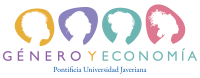



## **Sesión 3:  Nociones básicas de la Gran Encuesta Integrada de Hogares (GEIH) y uso de datos de la GEIH referentes a cuidado**
---
Autor: Linda Nataly Corredor Martínez. Asistente de investigación Proyecto Género y Economía (https://generoyeconomia.org).

---


**Contenido de la sesión:**
*  Repaso de estructuras de control y librería pandas.
1. El método merge de pandas.
2. Construcción de base de datos de un mes en GEIH.
3. Limpieza de datos.
4. Creación de variables de Cuidado.
5. Algunas estadísticas descriptivas.

Nota: El material relacionado con esta sesión se encuentra en la página del curso: https://generoyeconomia.github.io/python_economia_cuidado/index.html  , en la sección Módulo 3.

## **Importando Librerías**



In [ ]:
import pandas as pd   # Para el manejo de datos en DataFrames

## **1. Método Merge en la librería: pandas**
El método `merge` en pandas es una función que permite combinar dos DataFrames. Permite combinar datos en función de una o más claves comunes entre los DataFrames, facilitando la integración y análisis de datos procedentes de diferentes fuentes.

**Sintaxis**

`pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False)`

**Parámetros:**
* `right`: Este parámetro toma el DataFrame que se va a combinar con el DataFrame de la izquierda.

* `how`: Este parámetro especifica el tipo de combinación que se va a realizar, default ‘inner’. Los valores posibles son:
    1. `'left'`: Usa solo las claves del DataFrame de la izquierda.
    2. `'right'`: Usa solo las claves del DataFrame de la derecha.
    3. `'outer'`: Usa las claves de ambos DataFrames.
    4. `'inner'`: Usa solo las claves que están en ambos DataFrames (intersección).

* `on`: Lista o string que especifica el nombre de las columnas comunes en las que se va a realizar la combinación. Si no se especifica, y tanto left_on como right_on son None, entonces se intentará realizar la combinación en las columnas con nombres comunes.

* `suffixes`: Tupla de strings que se utiliza para añadir sufijos a las columnas con nombres duplicados en los DataFrames combinados. Por defecto es ('_x', '_y').

* `validate`: Se utiliza para validar el tipo de combinación que se está realizando entre los DataFrames. Esto es útil para asegurarse de que la combinación se realiza según lo esperado y para evitar errores o combinaciones inesperadas en los datos.
    1. `'one_to_one'`: Verifica que el merge es de uno a uno. Esto significa que cada valor en la clave de combinación en el DataFrame izquierdo corresponde a exactamente un valor en la clave de combinación en el DataFrame derecho.

    2. `'one_to_many'`: Verifica que el merge es de uno a muchos. Esto significa que cada valor en la clave de combinación en el DataFrame izquierdo corresponde a uno o más valores en la clave de combinación en el DataFrame derecho.

    3. `'many_to_one'`: Verifica que el merge es de muchos a uno. Esto significa que cada valor en la clave de combinación en el DataFrame derecho corresponde a uno o más valores en la clave de combinación en el DataFrame izquierdo.
    4. `'many_to_many'`: Verifica que el merge es de muchos a muchos. Esto significa que varios valores en la clave de combinación en el DataFrame izquierdo pueden corresponder a varios valores en la clave de combinación en el DataFrame derecho.

Para obtener más información sobre los parámetros del método merge de pandas, consulta el siguiente enlace a la documentación oficial: [Documentación de pandas merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).




---

**Ejemplo:**

Se tienen dos conjuntos de datos. El primer conjunto de datos tiene la identificación,  los nombres y las direcciones de los clientes de cierta tienda de cadena. El segundo conjunto de datos está con las compras realizadas por estos clientes. Como podemos ver, en este ejemplo, cada cliente tiene un id asociado. Usaremos este id para fusionar ambos DataFrames.

---



In [ ]:
# Dataframe de clientes
clientes = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6, 7],
    'nombre': ['Juan', 'María', 'Ana', 'Pedro', 'Luis', 'Carlos', 'Elena'],
    'direccion': ['Calle A', 'Calle B', 'Calle C', 'Calle D', 'Calle E', 'Calle F', 'Calle G']
})

# Esta función DataFrame.head(n) devuelve las primeras n filas del Dataframe según la posición.
clientes.head()

In [ ]:
# Dataframe de compras
compras = pd.DataFrame({
    'id': [1, 2, 4, 6, 8],
    'compra': ['Laptop', 'Teléfono', 'Tablet', 'Monitor', 'Impresora'],
    'valor_compra': [1260000, 850000, 1500000, 450000, 300000]
})

# Esta función DataFrame.head(n) devuelve las primeras n filas del Dataframe según la posición.
compras.head()

En pandas se tienen cuatro posibilidades para obtener un Dataframe final. Estas posibilidades se especifican a partir de parámetro `how`.

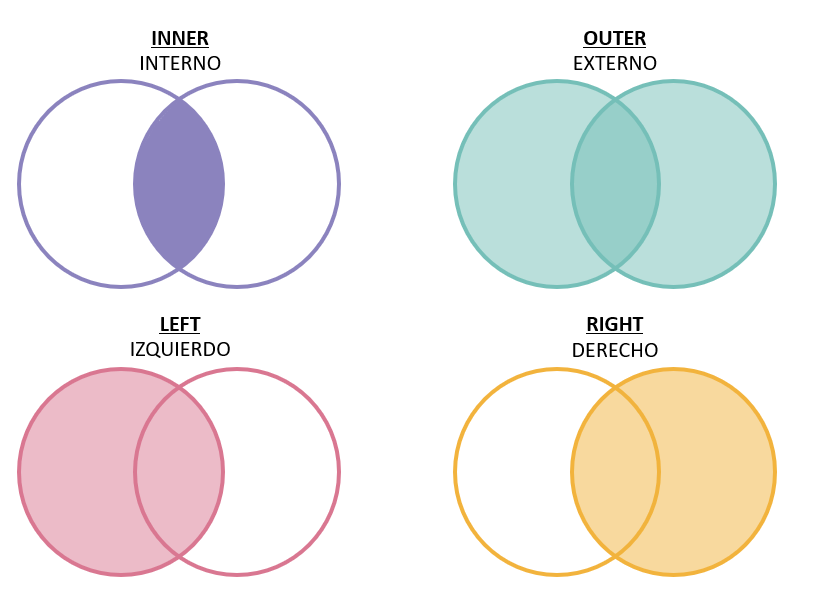

**Unión interna (INNER)**

Devuelve solo las filas con valores coincidentes en ambas tablas. Es el tipo de unión más común y la predeterminada para el método de `pandas.DataFrame.merge`.

In [ ]:
#Dataframe 1: Unión interna
compras_clientes_inner = pd.merge(clientes, compras, on='id', how='inner')
compras_clientes_inner.head()

,id,nombre,direccion,compra,valor_compra
0,1,Juan,Calle A,Laptop,1260000
1,2,María,Calle B,Teléfono,850000
2,4,Pedro,Calle D,Tablet,1500000
3,6,Carlos,Calle F,Monitor,450000





**Recuerda:**

El tipo de unión se especifica con el parámetro `how`. Al realizar una unión interna, como se vio arriba, no necesitamos especificar este parámetro ya que es el predeterminado.






In [ ]:
#Dataframe 2: Unión interna - Otra forma de especificar la unión en este caso.
compras_clientes_inner2 = clientes.merge(compras, on='id')
compras_clientes_inner2.head()

,id,nombre,direccion,compra,valor_compra
0,1,Juan,Calle A,Laptop,1260000
1,2,María,Calle B,Teléfono,850000
2,4,Pedro,Calle D,Tablet,1500000
3,6,Carlos,Calle F,Monitor,450000


**Unión externa (OUTER)**

La unión externa o "outer" utiliza la unión de ambos conjuntos de datos. Devuelve todas las filas cuando hay una coincidencia en una de las tablas. Las filas sin coincidencia se llenan con NaN.

In [ ]:
# Datraframe 3: Unión externa
compras_clientes_outer = pd.merge(clientes, compras, on='id', how='outer')
compras_clientes_outer.head()

,id,nombre,direccion,compra,valor_compra
0,1,Juan,Calle A,Laptop,1260000.0
1,2,María,Calle B,Teléfono,850000.0
2,3,Ana,Calle C,NaN,NaN
3,4,Pedro,Calle D,Tablet,1500000.0
4,5,Luis,Calle E,NaN,NaN




---
**Ejercicio**:

Ya que tienes claro cómo es la sintaxis y teniendo en cuenta las tablas de clientes y compras, realiza las siguientes operaciones y responde a las preguntas.

**Instrucciones:**
1. **Realiza una unión (merge) de tipo "left"** entre las tablas de clientes y compras basándote en la columna id. Este merge debe incluir todos los registros de la tabla de clientes, incluso si no tienen compras asociadas.

2. **Realiza una unión (merge) de tipo "right"** entre las tablas de clientes y compras basándote en la columna id. Este merge debe incluir todos los registros de la tabla de compras, incluso si no tienen clientes asociados.

**Preguntas:**
Con base en lo que hiciste anteriormente, responde a las siguientes preguntas, y estas respuesta escríbela en el chat de la reunión.


*   ¿Qué cliente(s) no hizo(hicieron) ninguna compra?
*   ¿Qué producto(s) fue(ron) comprado(s) y no registra(n) datos del cliente?



---





---
**Ejercicio adicional (para realizar fuera de clase):**
A partir de la base de datos resultante del merge tipo `left` :

1. Calcula el valor total de las compras realizadas por cada cliente. Filtra las filas donde compra no es NaN y agrupa los datos por nombre para sumar el valor de las compras.
2. Identifica los clientes que tienen una compra cuyo valor es mayor a 1,000,000. Filtra las filas donde valor_compra es mayor a 1,000,000 y extrae los nombres de esos clientes.


---

